<a href="https://colab.research.google.com/github/AbR04/6thSem-ML-Lab/blob/main/1BM22CS005_Lab_7_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Accuracy (Linear Kernel): 100.00%
Accuracy (RBF Kernel): 100.00%

Confusion Matrix (Linear Kernel):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Confusion Matrix (RBF Kernel):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


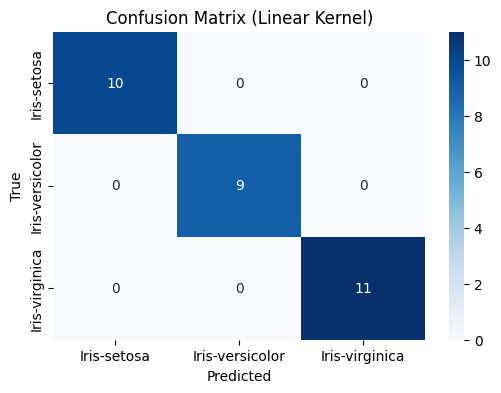

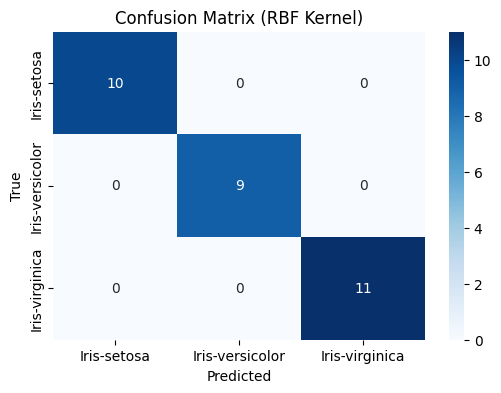

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your local dataset (assuming it's in CSV format)
# Replace 'path_to_your_iris_data.csv' with the actual file path of your dataset
file_path = 'iris.csv'  # Example: 'C:/datasets/iris.csv'
data = pd.read_csv(file_path)

# Check the first few rows to confirm it loaded correctly
print(data.head())

# If necessary, adjust column names or data format (e.g., ensure correct column names)
# Assuming columns: sepal_length, sepal_width, petal_length, petal_width, species

# Assign features (X) and target (y)
X = data.drop('species', axis=1)  # Features (all columns except 'species')
y = data['species']  # Target (species)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = svm_linear.predict(X_test)

# Calculate accuracy and confusion matrix for linear kernel
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Initialize and train the SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate accuracy and confusion matrix for RBF kernel
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Displaying accuracy scores
print(f"Accuracy (Linear Kernel): {accuracy_linear * 100:.2f}%")
print(f"Accuracy (RBF Kernel): {accuracy_rbf * 100:.2f}%")

# Displaying confusion matrices
print("\nConfusion Matrix (Linear Kernel):")
print(conf_matrix_linear)
print("\nConfusion Matrix (RBF Kernel):")
print(conf_matrix_rbf)

# Plotting confusion matrices using seaborn heatmap for better visualization
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['species'].unique(), yticklabels=data['species'].unique())
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_linear, "Confusion Matrix (Linear Kernel)")
plot_confusion_matrix(conf_matrix_rbf, "Confusion Matrix (RBF Kernel)")


  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10  
Accuracy: 85.45%

Confusion Matrix:
[[140   1   0   0   0   0   2   0   0   2   0   0   0   0   0   0   0   1
    1   0   0   1   0   0   1   0]
 [  1 133   0   3   

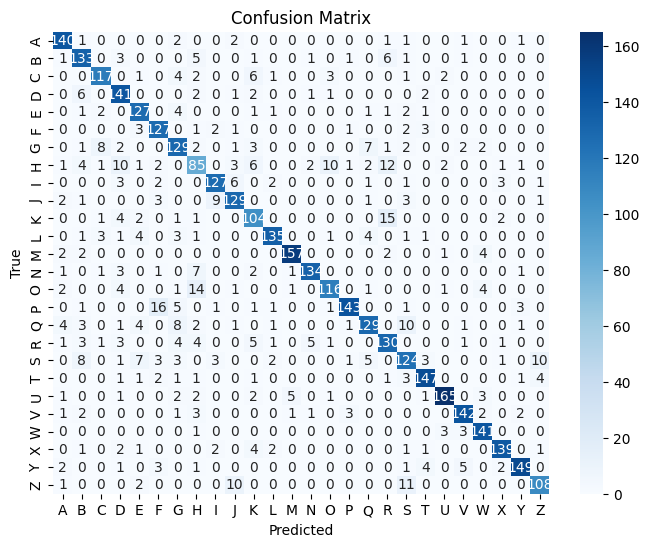

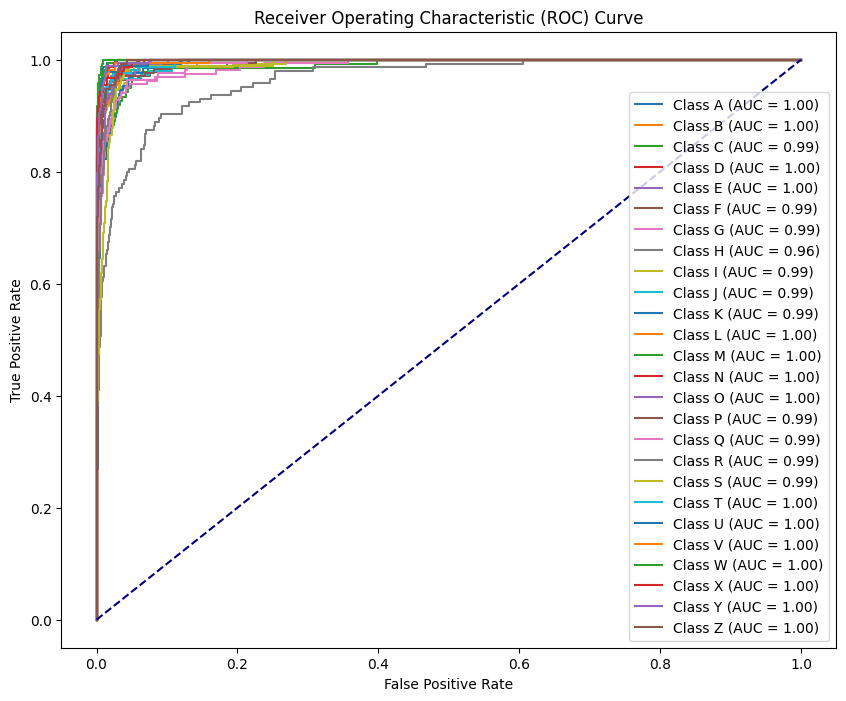

Average AUC: 0.99


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Load the Letter-recognition dataset (adjust path as needed)
file_path = 'letter-recognition.csv'  # Example: 'C:/datasets/letter_recognition.csv'
data = pd.read_csv(file_path)

# Check the first few rows to confirm it loaded correctly
print(data.head())

# Assign features (X) and target (y)
X = data.drop('letter', axis=1)  # Features (all columns except 'letter')
y = data['letter']  # Target (letter column)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier (using linear kernel here)
svm = SVC(kernel='linear', probability=True)  # Set probability=True to calculate ROC curve
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn heatmap
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['letter'].unique()), yticklabels=sorted(data['letter'].unique()))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(conf_matrix, "Confusion Matrix")

# Prepare for ROC curve
# Binarize the output for multi-class ROC (One-vs-Rest approach)
lb = LabelBinarizer()
y_bin_train = lb.fit_transform(y_train)
y_bin_test = lb.transform(y_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], svm.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC score for the multi-class case
multi_class_auc = sum(roc_auc.values()) / len(roc_auc)
print(f"Average AUC: {multi_class_auc:.2f}")
